## Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('climate_nasa.csv')  

# Display the first few rows of the dataset
print(df.head())


                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

## Step 2: Data Cleaning

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Convert the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Display the cleaned dataset info
print(df.info())


Number of duplicate entries: 0
Missing values in each column:
date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           522 non-null    datetime64[ns, UTC]
 1   likesCount     522 non-null    int64              
 2   profileName    522 non-null    object             
 3   commentsCount  244 non-null    float64            
 4   text           504 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 20.5+ KB
None


### Handle Missing Values

In [6]:
# Handling missing values for commentsCount
# Option 1: Fill with median
df['commentsCount'].fillna(df['commentsCount'].median(), inplace=True)

# Option 2: Drop rows (Uncomment if you prefer this option)
# df.dropna(subset=['commentsCount'], inplace=True)

# Handling missing values for text
df.dropna(subset=['text'], inplace=True)

# Check the updated dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   date           504 non-null    datetime64[ns, UTC]
 1   likesCount     504 non-null    int64              
 2   profileName    504 non-null    object             
 3   commentsCount  504 non-null    float64            
 4   text           504 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 23.6+ KB
None


## Step 3: Exploratory Data Analysis (EDA)

C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


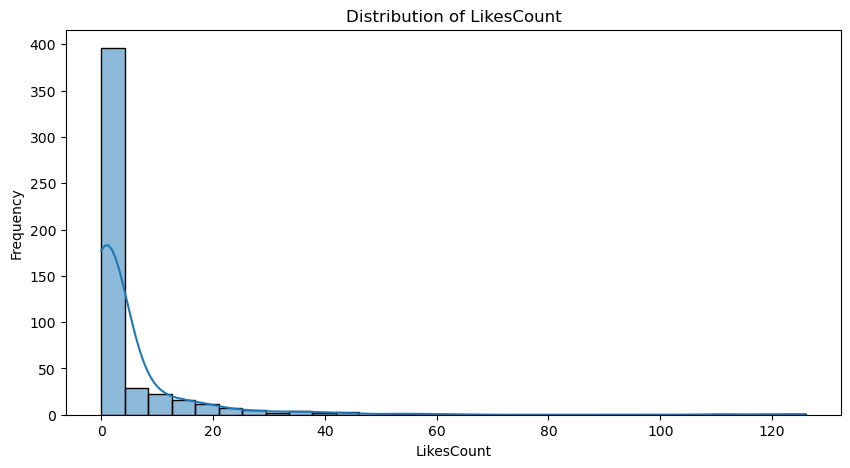

C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


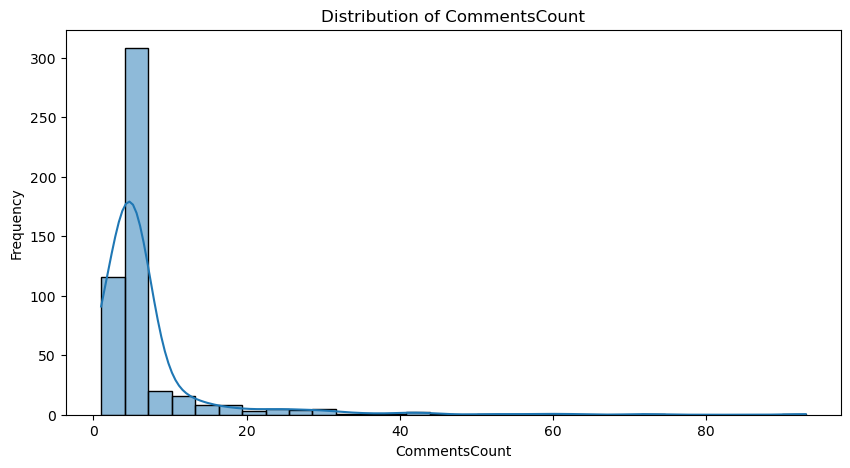

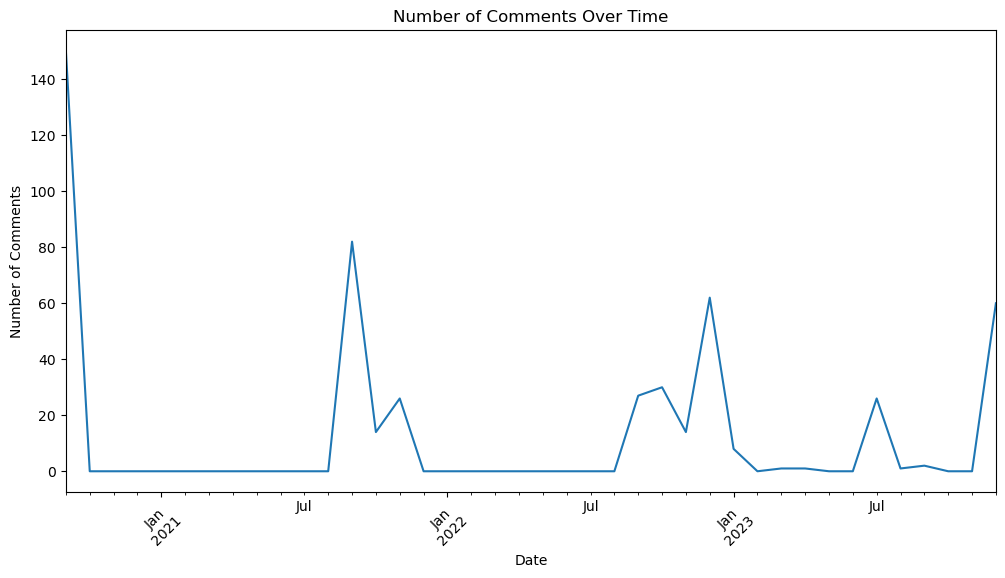

In [9]:
# Histogram for LikesCount
plt.figure(figsize=(10, 5))
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title('Distribution of LikesCount')
plt.xlabel('LikesCount')
plt.ylabel('Frequency')
plt.show()

# Histogram for CommentsCount
plt.figure(figsize=(10, 5))
sns.histplot(df['commentsCount'], bins=30, kde=True)
plt.title('Distribution of CommentsCount')
plt.xlabel('CommentsCount')
plt.ylabel('Frequency')
plt.show()

# Time series plot for comment counts over time
plt.figure(figsize=(12, 6))
df.set_index('date').resample('M').size().plot()
plt.title('Number of Comments Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()


## Step 4: Sentiment Analysis

                                                text  Sentiment
0  Neat comparison I have not heard it before.\n ...   0.000000
1  An excellent way to visualise the invisible! T...   0.600000
2  Does the CO2/ghg in the troposphere affect the...   0.000000
3  excellent post! I defo feel the difference - o...   0.053571
4  Yes, and carbon dioxide does not harm the Eart...  -0.375000


C:\Users\tikul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


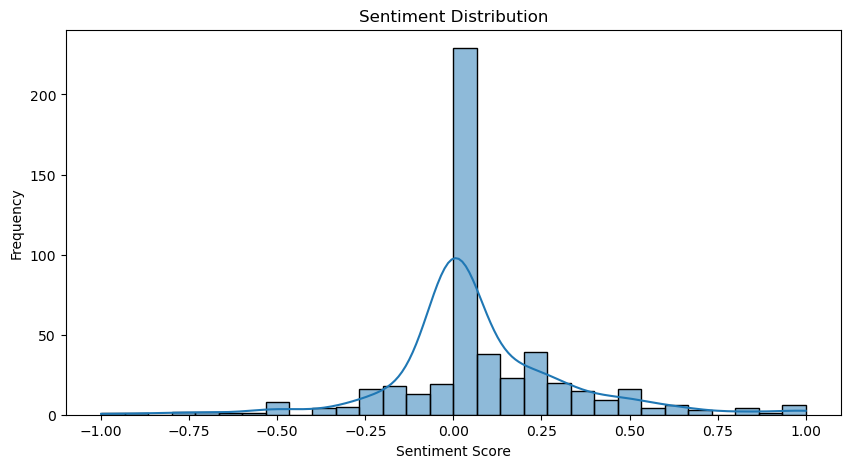

In [11]:
from textblob import TextBlob

# Define a function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment function to the 'Text' column
df['Sentiment'] = df['text'].apply(get_sentiment)

# Display the first few rows with sentiment scores
print(df[['text', 'Sentiment']].head())

# Visualize sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


## Step 5: Save Cleaned Data

In [12]:
df.to_csv('cleaned_comments_data.csv', index=False)


## Step 6: Trend Analysis


### 6.1 Sentiment Trend Over Time

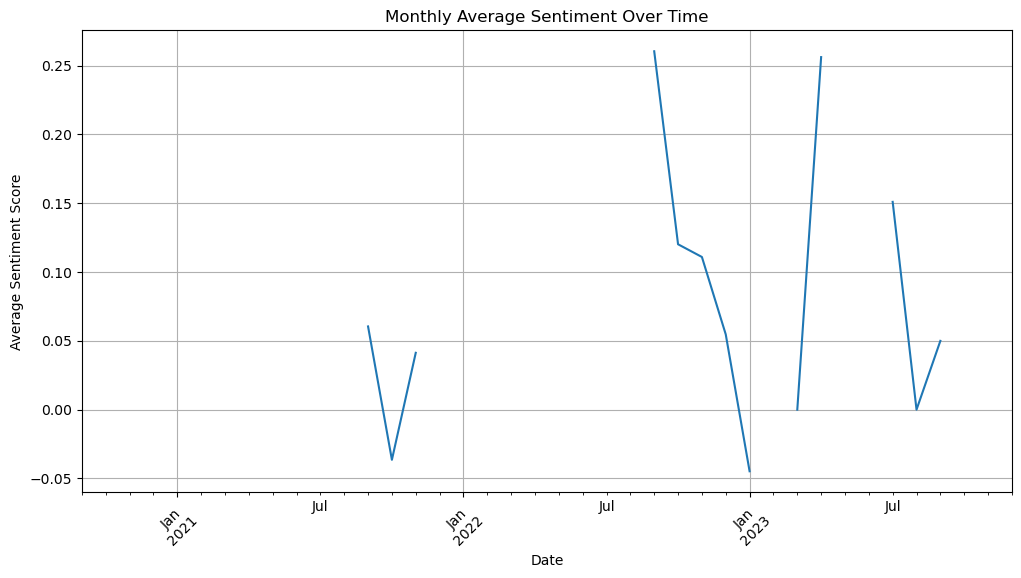

In [14]:
# Resampling sentiment scores by month
monthly_sentiment = df.resample('M', on='date')['Sentiment'].mean()

# Plotting the trend of sentiment over time
plt.figure(figsize=(12, 6))
monthly_sentiment.plot()
plt.title('Monthly Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()


### 6.2 Engagement Trend Over Time


<Figure size 1200x600 with 0 Axes>

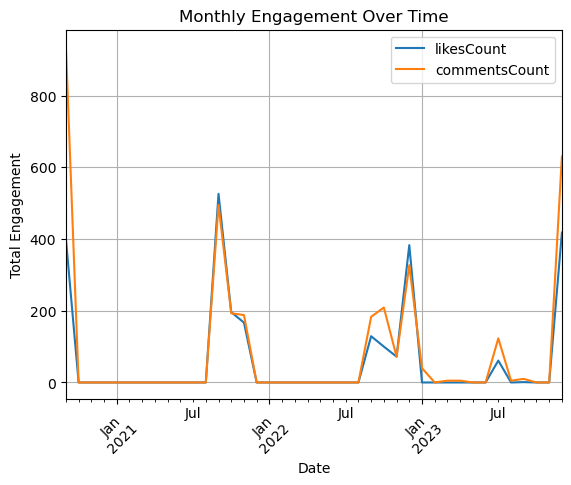

In [19]:
# Resampling likesCount and commentsCount by month
monthly_engagement = df.resample('M', on='date').agg({'likesCount': 'sum', 'commentsCount': 'sum'})

# Plotting the trends
plt.figure(figsize=(12, 6))
monthly_engagement.plot()
plt.title('Monthly Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Step 7: Engagement Analysis


               Sentiment  likesCount  commentsCount
Sentiment       1.000000    0.035299      -0.038887
likesCount      0.035299    1.000000       0.385142
commentsCount  -0.038887    0.385142       1.000000


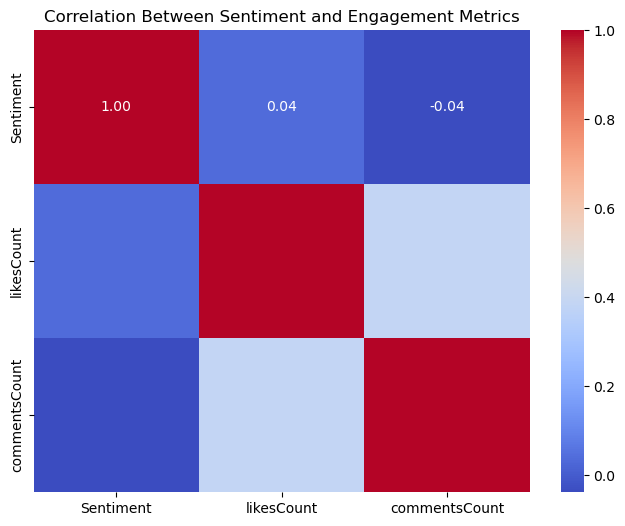

In [21]:
# Calculate correlation between sentiment and engagement metrics
correlation = df[['Sentiment', 'likesCount', 'commentsCount']].corr()
print(correlation)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiment and Engagement Metrics')
plt.show()


## Step 8: Topic Modeling

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english')
text_matrix = vectorizer.fit_transform(df['text'])  # Use the original 'text' column

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # You can adjust n_components
lda.fit(text_matrix)

# Display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 5)


Topic 0:
global temperature climate warming change
Topic 1:
co2 climate heat earth change
Topic 2:
carbon sea earth atmosphere dioxide
Topic 3:
climate warming global change people
Topic 4:
climate change earth nasa planet


### Topic Distribution Visualization


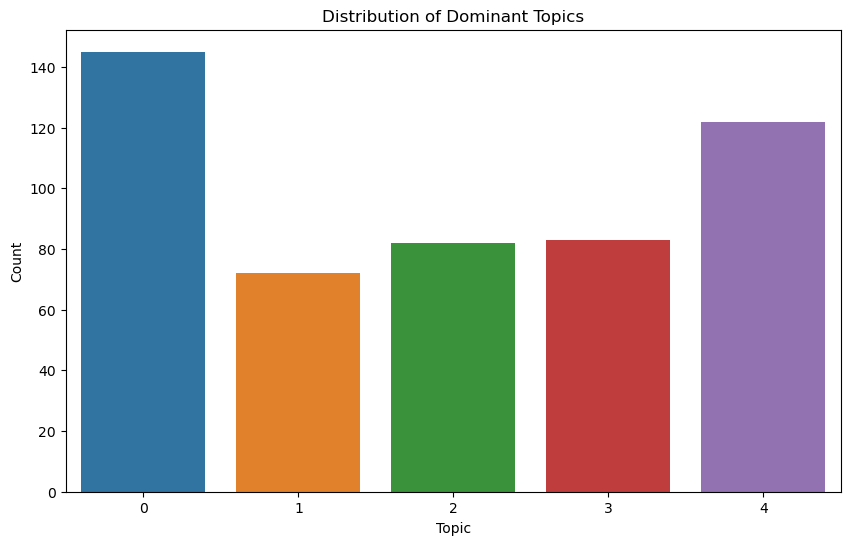

In [26]:
topic_distribution = lda.transform(text_matrix)

# Add the dominant topic for each comment to the DataFrame
df['Dominant Topic'] = topic_distribution.argmax(axis=1)

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant Topic', data=df)
plt.title('Distribution of Dominant Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()
